In [1]:
import csv
import os
import numpy as np
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt
#https://medium.com/omics-diary/how-to-use-gseapy-for-pathway-enrichment-analysis-67a1aab1002d
from anndata import AnnData
import scanpy as sc
import sys
sys.path.append("../")
import scformer as scf
from scformer.tasks.grn import GeneEmbedding
import time
from tqdm import tqdm
os.environ["KMP_WARNINGS"] = "off"
os.environ["KMP_WARNINGS"] = "off"
import seaborn as sns
sns.set_theme(style='whitegrid')
import collections
import numpy as np
from sklearn.decomposition import NMF

Global seed set to 0
/h/chloexq/.cache/pypoetry/virtualenvs/scformer-YeftUsZU-py3.7/lib/python3.7/site-packages/flatbuffers/compat.py:19: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp


In [2]:
import socket
import unittest
import warnings

warnings.simplefilter("ignore", ResourceWarning)

In [97]:
sc.set_figure_params(figsize=(4, 4))

/h/chloexq/.cache/pypoetry/virtualenvs/scformer-YeftUsZU-py3.7/lib/python3.7/site-packages/scanpy/_settings.py:447: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)


In [98]:
# Reactome p/N result
# scores = np.array([
#     #[1, 11, 109.09, 212],
#     [5, 45, 22.91, 126],
#     [10, 67, 13.56, 109],
#     [20, 85, 8.95, 105],
#     [30, 83, 7.33, 101],
#     [40, 63, 7.01, 111],
#     [50, 48, 6.33, 111],
#     [60, 36, 5.97, 90],
# ]) 

In [99]:
scores = np.array([
    [1, 10, 119.4, 51],
    [5, 43, 26.32, 51],
    [10, 72, 12.79, 31],
    [20, 62, 8.01, 27],
    [30, 37, 7.70, 25],
    [40, 23, 7.65, 21],
    [50, 19, 7.36, 20],
    [60, 15, 6.66, 23],
]) 

In [100]:
df_scores_coexp = pd.DataFrame(data = scores, columns = ['Leiden Resolution', 'Number of Gene Programs', 'Avg Size of Gene Programs', 'Number of Enriched Pathways'])
df_scores_coexp['Method'] = 'Co-expression'
#df_scores['#Gene Programs'] = np.log(df_scores['#Gene Programs'].values.astype(np.float))
#df_scores['Avg #Genes'] = np.log(df_scores['Avg #Genes'].values.astype(np.float))

In [101]:
scores = np.array([
    [1, 11, 109.09, 69],
    [5, 48, 24.93, 78],
    [10, 94, 12.73, 64],
    [20, 142, 7.65, 56],
    [30, 119, 6.51, 52],
    [40, 76, 5.89, 43],
    [50, 54, 5.81, 47],
    [60, 25, 6.32, 42],
])

In [102]:
# Reactome p/N result
# scores = np.array([
#     #[1, 11, 109.09, 212],
#     [5, 48, 24.93, 157],
#     [10, 94, 12.73, 141],
#     [20, 142, 7.65, 147],
#     [30, 119, 6.51, 144],
#     [40, 76, 5.89, 115],
#     [50, 54, 5.81, 114 ],
#     [60, 25, 6.32, 98],
# ])
# new model
scores = np.array([
    [1, 11, 109.09, 96],
    [5, 52, 23.07, 97],
    [10, 99, 11.97, 79],
    [20, 137, 7.62, 62],
    [30, 129, 6.41, 49],
    [40, 90, 5.76, 46],
    [50, 49, 5.79, 43],
    [60, 30, 5.8, 38],
])
df_scores_scGPT = pd.DataFrame(data = scores, columns = ['Leiden Resolution', 'Number of Gene Programs', 'Avg Size of Gene Programs', 'Number of Enriched Pathways'])
df_scores_scGPT['Method'] = 'Finetuned scGPT'

In [103]:
df_scores = pd.concat([df_scores_coexp, df_scores_scGPT])
df_scores

,Leiden Resolution,Number of Gene Programs,Avg Size of Gene Programs,Number of Enriched Pathways,Method
0,1.0,10.0,119.40,51.0,Co-expression
1,5.0,43.0,26.32,51.0,Co-expression
2,10.0,72.0,12.79,31.0,Co-expression
3,20.0,62.0,8.01,27.0,Co-expression
4,30.0,37.0,7.70,25.0,Co-expression
5,40.0,23.0,7.65,21.0,Co-expression
6,50.0,19.0,7.36,20.0,Co-expression
7,60.0,15.0,6.66,23.0,Co-expression
0,1.0,11.0,109.09,96.0,Finetuned scGPT
1,5.0,52.0,23.07,97.0,Finetuned scGPT


In [104]:
sns.set_style("white")

In [105]:
# minsize = 50
# maxsize = 150
# ax = sns.scatterplot(data=df_scores, 
#                      x='Leiden Resolution', 
#                      y='Number of Enriched Pathways', 
#                      hue='Method', 
#                      palette = {'Finetuned scGPT': '#DC1D90', 'Co-expression': '#5F74CF'},
#                      size='Number of Gene Programs',
#                      sizes=(minsize, maxsize),
#                      legend='brief'
#                     )
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# ax.set_ylim(10, 90)
# sns.despine(top=True, right=True)

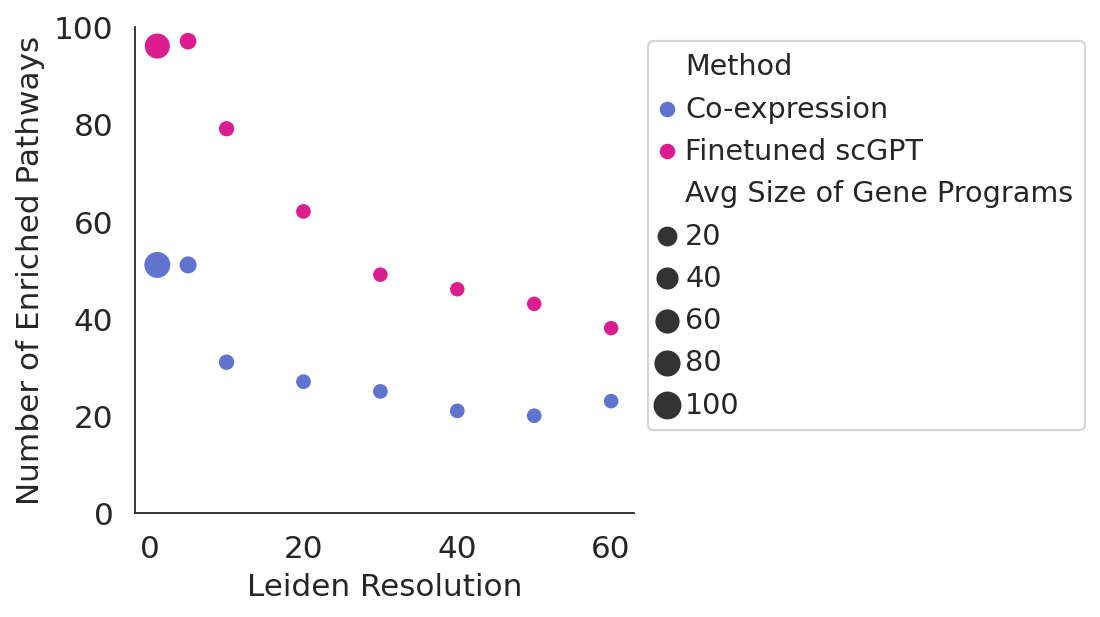

In [107]:
minsize = 50
maxsize = 150
ax = sns.scatterplot(data=df_scores, 
                     x='Leiden Resolution', 
                     y='Number of Enriched Pathways', 
                     hue='Method', 
                     size='Avg Size of Gene Programs',
                     palette = {'Finetuned scGPT': '#DC1D90', 'Co-expression': '#5F74CF'},
                     sizes=(minsize, maxsize),
                     legend='brief'
                    )
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#ax.set_ylim(0, 90)
ax.set_ylim(0, 100)
sns.despine(top=True, right=True)

In [14]:
df_scores

,Leiden Resolution,Number of Gene Programs,Avg Size of Gene Programs,Number of Enriched Pathways,Method
0,1.0,10.0,119.40,51.0,Co-expression
1,5.0,43.0,26.32,51.0,Co-expression
2,10.0,72.0,12.79,31.0,Co-expression
3,20.0,62.0,8.01,27.0,Co-expression
4,30.0,37.0,7.70,25.0,Co-expression
5,40.0,23.0,7.65,21.0,Co-expression
6,50.0,19.0,7.36,20.0,Co-expression
7,60.0,15.0,6.66,23.0,Co-expression
0,1.0,11.0,109.09,69.0,Finetuned scGPT
1,5.0,48.0,24.93,78.0,Finetuned scGPT


In [17]:
# scGpt
scores = np.array([
    #[1, 11, 109.09, 69],
    [5, 48, 24.93, 78],
    [10, 94, 12.73, 64],
    [20, 142, 7.65, 56],
    [30, 119, 6.51, 52],
    [40, 76, 5.89, 43],
    [50, 54, 5.81, 47],
    [60, 25, 6.32, 42],
])

# Load data

In [12]:
df_database = pd.DataFrame(
data = [['GO_Biological_Process_2021', 6036],
['GO_Molecular_Function_2021', 1274],
['Reactome_2022', 1818]],
columns = ['dataset', 'term'])

In [19]:
adata = sc.read('/scratch/ssd004/scratch/chloexq/data/scib_datasets/immune_human_1200.h5ad', cache=True)

/h/chloexq/.cache/pypoetry/virtualenvs/scformer-YeftUsZU-py3.7/lib/python3.7/site-packages/h5py/_hl/dataset.py:767: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)


In [20]:
np.array(adata.layers['X_normed'].todense().T)[0].shape

(33506,)

In [97]:
#X = adata.layers['X_normed'].todense().T
#model = NMF(n_components=512, init='random', random_state=0)
#W = model.fit_transform(X)
#H = model.components_
#df_gene_embeddings = pd.DataFrame(data = gene_embeddings, columns = gene_ids)
# Normalize to 0-2
#corr_matrix = df_gene_embeddings.corr()+1
#gdata = sc.AnnData(df_gene_embeddings.T)
#sc.tl.leiden(gdata, resolution=10, adjacency=corr_matrix.values, directed=False)
#metagenes = collections.defaultdict(list)
#for x, y in zip(gdata.obs["leiden"], gdata.obs.index):
#    metagenes[x].append(y)
#metagenes_filtered = [i[1] for i in metagenes.items() if len(i[1]) > 4]
#gdata.obs["leiden"]

# Coexpression Experiments start here

In [24]:
# Construct co-expression matrix
gene_ids = np.array(adata.var.index.tolist())
gene_embeddings = np.array(adata.layers['X_normed'].todense())
df_gene_embeddings = pd.DataFrame(data = gene_embeddings, columns = gene_ids)

In [25]:
df_gene_embeddings.head()

,HES4,ISG15,TNFRSF18,TNFRSF4,TNFRSF25,TNFRSF9,RBP7,PGD,AGTRAP,TNFRSF1B,...,APP,ADAMTS5,BACH1,IFNGR2,ITSN1,CLIC6,MX1,COL18A1,COL6A2,S100B
0,6.467137,11.373231,0.0,0.0,0.000000,0.0,0.0,0.000000,4.100568,6.467137,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,4.100568,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,11.600616,0.0,0.0,0.000000,8.058005,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,4.842186,0.000000,0.000000,...,4.842186,0.0,7.451117,4.842186,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.000000,5.676993,0.0,0.0,0.000000,0.0,0.0,8.551018,5.676993,5.676993,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,7.753437,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0


In [26]:
# Take absolutae value to consider both positive and negative correlations
corr_matrix = abs(df_gene_embeddings.corr())

In [27]:
corr_matrix.head(5)

,HES4,ISG15,TNFRSF18,TNFRSF4,TNFRSF25,TNFRSF9,RBP7,PGD,AGTRAP,TNFRSF1B,...,APP,ADAMTS5,BACH1,IFNGR2,ITSN1,CLIC6,MX1,COL18A1,COL6A2,S100B
HES4,1.000000,0.070449,0.020526,0.029646,0.043533,0.014937,0.015605,0.010895,0.042041,0.193218,...,0.011366,0.000914,0.068963,0.117700,0.016105,0.003051,0.002217,0.016989,0.016146,0.015321
ISG15,0.070449,1.000000,0.030944,0.051814,0.010993,0.006607,0.005573,0.033133,0.006294,0.011578,...,0.043227,0.014487,0.006386,0.001618,0.006437,0.005703,0.145709,0.002470,0.009256,0.013956
TNFRSF18,0.020526,0.030944,1.000000,0.154459,0.029958,0.011005,0.050105,0.054474,0.021238,0.018710,...,0.032344,0.011478,0.026341,0.050823,0.015556,0.003343,0.005646,0.024718,0.019989,0.009394
TNFRSF4,0.029646,0.051814,0.154459,1.000000,0.082108,0.012348,0.064815,0.063532,0.057744,0.031479,...,0.038183,0.013441,0.043391,0.062016,0.013283,0.000531,0.009396,0.018278,0.010005,0.024105
TNFRSF25,0.043533,0.010993,0.029958,0.082108,1.000000,0.020073,0.094432,0.100469,0.083109,0.069659,...,0.046081,0.024563,0.078273,0.101167,0.034429,0.003440,0.002525,0.019746,0.025870,0.036639


In [28]:
# Trim to graph with 15 NNs
N = 15
corr_matrix_mask_row = corr_matrix.mask(corr_matrix.rank(axis=1, method='min', ascending=False) > N, 0) > 0
corr_matrix_mask_col = corr_matrix.mask(corr_matrix.rank(axis=0, method='min', ascending=False) > N, 0) > 0

In [29]:
(corr_matrix==corr_matrix.T).all().all()

True

In [30]:
corr_matrix_mask = np.logical_or(corr_matrix_mask_row, corr_matrix_mask_col)

In [31]:
(corr_matrix_mask==corr_matrix_mask.T).all().all()

True

In [32]:
corr_matrix_topN = corr_matrix[corr_matrix_mask].fillna(0)

In [33]:
(corr_matrix_topN==corr_matrix_topN.T).all().all()

True

In [34]:
corr_matrix_topN.head()

,HES4,ISG15,TNFRSF18,TNFRSF4,TNFRSF25,TNFRSF9,RBP7,PGD,AGTRAP,TNFRSF1B,...,APP,ADAMTS5,BACH1,IFNGR2,ITSN1,CLIC6,MX1,COL18A1,COL6A2,S100B
HES4,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
ISG15,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.145709,0.0,0.0,0.0
TNFRSF18,0.0,0.0,1.000000,0.154459,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
TNFRSF4,0.0,0.0,0.154459,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
TNFRSF25,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


# From here start testing in Reactome, set res to different values

In [37]:
res = 40
databases = ['Reactome_2022'] #['GO_Biological_Process_2021', 'GO_Molecular_Function_2021']
m = df_database[df_database['dataset'].isin(databases)]['term'].sum() #df_database['term'].sum()
print(m)

1818


In [38]:
gdata = sc.AnnData(df_gene_embeddings.T)
sc.tl.leiden(gdata, resolution=res, adjacency=corr_matrix_topN.values)

/h/chloexq/.cache/pypoetry/virtualenvs/scformer-YeftUsZU-py3.7/lib/python3.7/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [39]:
metagenes = collections.defaultdict(list)
for x, y in zip(gdata.obs["leiden"], gdata.obs.index):
    metagenes[x].append(y)

In [40]:
metagenes_filtered = [i[1] for i in metagenes.items() if len(i[1]) > 4]

In [41]:
len(metagenes_filtered)

23

In [42]:
gene_program_size = [len(i) for i in metagenes_filtered]
np.array(gene_program_size).mean()

7.6521739130434785

In [43]:
# adjust the p-value threshold by the number of gene programs
p_thresh = 0.05/(len(metagenes_filtered)*m)

In [44]:
df = pd.DataFrame()
sum_hits = 0
counter = 0
for gene_list in tqdm(metagenes_filtered):
    try:
        enr_Reactome = gp.enrichr(gene_list=gene_list,
                                  gene_sets=databases,
                                  organism='Human', 
                                  outdir='test/enr_DEGs_Reactome_up',
                                  cutoff=0.5)
        out = enr_Reactome.results
        out['Gene List'] = str(gene_list)
        out = out[out['P-value'] < p_thresh]
        df = df.append(out, ignore_index=True)
        sum_hits += len(out)
        counter += 1
    except:
        print("Error")
    time.sleep(0.1)

100%|██████████| 23/23 [00:26<00:00,  1.15s/it]


In [45]:
len(df)

21

In [46]:
# Correlation
# res, #gene programs, size of gene programs, # hits in reactome
scores = np.array([
    [1, 10, 119.4, 51],
    [5, 43, 26.32, 51],
    [10, 72, 12.79, 31],
    [20, 62, 8.01, 27],
    [30, 37, 7.70, 25],
    [40, 23, 7.65, 21],
    [50, 19, 7.36, 20],
    [60, 15, 6.66, 23],
]) 

In [60]:
#df.to_csv('/scratch/ssd004/scratch/chloexq/data/grn_analysis/coexp_res_{}.csv'.format(res))

In [47]:
# gene_ids = np.array(adata.var.index.tolist())
# gene_embeddings = np.array(adata.layers['X_normed'].todense().T)
# #gene_embeddings = {gene: gene_embeddings[i] for i, gene in enumerate(gene2idx.keys()) if gene in adata.var.index.tolist()}
# gene_embeddings = {gene: gene_embeddings[i] for i, gene in enumerate(gene_ids)}

In [48]:
# embed = GeneEmbedding(gene_embeddings)

In [49]:
# res = 40
# databases = ['Reactome_2022'] #['GO_Biological_Process_2021', 'GO_Molecular_Function_2021']
# m = df_database[df_database['dataset'].isin(databases)]['term'].sum() #df_database['term'].sum()
# print(m)

In [50]:
# # leiden clustering
# gdata = embed.get_adata(resolution=res)
# metagenes = embed.get_metagenes(gdata)
# # Filter out the gene programs with number of genes > 4
# metagenes_filtered = [i[1] for i in metagenes.items() if len(i[1]) > 4]

In [51]:
# len(metagenes_filtered)

In [52]:
# gene_program_size = [len(i) for i in metagenes_filtered]
# np.array(gene_program_size).mean()

In [53]:
# # adjust the p-value threshold by the number of gene programs
# p_thresh = 0.05/(len(metagenes_filtered)*m)

In [54]:
# df = pd.DataFrame()
# sum_hits = 0
# counter = 0
# for gene_list in tqdm(metagenes_filtered):
#     try:
#         enr_Reactome = gp.enrichr(gene_list=gene_list,
#                                   gene_sets=databases,
#                                   organism='Human', 
#                                   outdir='test/enr_DEGs_Reactome_up',
#                                   cutoff=0.5)
#         out = enr_Reactome.results
#         out['Gene List'] = str(gene_list)
#         out = out[out['P-value'] < p_thresh]
#         df = df.append(out, ignore_index=True)
#         sum_hits += len(out)
#         counter += 1
#     except:
#         print("Error")
#     time.sleep(0.1)

In [55]:
#df.to_csv('/h/chloexq/scFormer/examples/grn_analysis/coexp_res_{}.csv'.format(res))

# scGPT experiments

In [4]:
adata = sc.read('/scratch/ssd004/scratch/chloexq/data/scib_datasets/immune_human_1200.h5ad', cache=True)

/h/chloexq/.cache/pypoetry/virtualenvs/scformer-YeftUsZU-py3.7/lib/python3.7/site-packages/h5py/_hl/dataset.py:767: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)


In [5]:
# %%
import copy
import gc
import json
import os
from pathlib import Path
import sys
import time
import traceback
from typing import List, Tuple, Dict, Union, Optional
import warnings

import torch
from anndata import AnnData
import scanpy as sc
import scvi
import numpy as np
import wandb
from scipy.sparse import issparse
import matplotlib.pyplot as plt
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from torchtext.vocab import Vocab
from torchtext._torchtext import (
    Vocab as VocabPybind,
)

sys.path.append("../")
import scformer as scf
from scformer.tokenizer.gene_tokenizer import GeneVocab
from scformer.model import TransformerModel, AdversarialDiscriminator
from scformer.tokenizer import tokenize_and_pad_batch, random_mask_value
from scformer.preprocess import Preprocessor
from scformer import SubsetsBatchSampler
from scformer.utils import set_seed, category_str2int, eval_scib_metrics

sc.set_figure_params(figsize=(4, 4))
os.environ["KMP_WARNINGS"] = "off"
os.environ["WANDB_MODE"] = "offline"

In [6]:
hyperparameter_defaults = dict(
    seed=42,
    dataset_name="immune_human",  # "pancreas", "immune_human", "PBMC_10K"
    do_train=True,
    load_model= "/scratch/ssd004/scratch/chloexq/dev_immune_human_zeroin_mvc_ecs_dab_hvg-Jun24-17-07",
    #"/ssd005/home/haotian/scFormer/examples/save/dev_immune_human_zeroin_mvc_ecs_dab_hvg-Apr23-09-37", # Replace with new Immune Human model
    mask_ratio=0.4,
    epochs=30,
    n_bins=51,
    MVC=True,  # Masked value prediction for cell embedding
    ecs_thres=0.8,  # Elastic cell similarity objective, 0.0 to 1.0, 0.0 to disable
    dab_weight=1.0,
    lr=1e-4,
    batch_size=64,
    layer_size=128,
    nlayers=4,  # number of nn.TransformerEncoderLayer in nn.TransformerEncoder
    nhead=4,  # number of heads in nn.MultiheadAttention
    dropout=0.2,  # dropout probability
    schedule_ratio=0.9,  # ratio of epochs for learning rate schedule
    save_eval_interval=5,
    fast_transformer=True,
    pre_norm=False,
    amp=True,  # Automatic Mixed Precision
)
run = wandb.init(
    config=hyperparameter_defaults,
    project="scFormer",
    reinit=True,
    settings=wandb.Settings(start_method="fork"),
)
config = wandb.config
print(config)

set_seed(config.seed)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


{'seed': 42, 'dataset_name': 'immune_human', 'do_train': True, 'load_model': '/scratch/ssd004/scratch/chloexq/dev_immune_human_zeroin_mvc_ecs_dab_hvg-Jun24-17-07', 'mask_ratio': 0.4, 'epochs': 30, 'n_bins': 51, 'MVC': True, 'ecs_thres': 0.8, 'dab_weight': 1.0, 'lr': 0.0001, 'batch_size': 64, 'layer_size': 128, 'nlayers': 4, 'nhead': 4, 'dropout': 0.2, 'schedule_ratio': 0.9, 'save_eval_interval': 5, 'fast_transformer': True, 'pre_norm': False, 'amp': True}


In [7]:
# settings for input and preprocessing
pad_token = "<pad>"
special_tokens = [pad_token, "<cls>", "<eoc>"]
mask_ratio = config.mask_ratio
mask_value = "auto"  # for masked values, now it should always be auto

n_hvg = 1200  # number of highly variable genes

# # select 20% of zero genes that has the highest similarity to non-zero expression genes
# include_zero_gene = 0.2
include_zero_gene = True  # if True, include zero genes among hvgs in the training
max_seq_len = n_hvg + 1
n_bins = config.n_bins

# input/output representation
input_style = "binned"  # "normed_raw", "log1p", or "binned"
# TODO: support setting output style separately, it is easy to do using torch dataset
output_style = "binned"  # "normed_raw", "log1p", or "binned"

# settings for training
MLM = True  # whether to use masked language modeling, currently it is always on.
CLS = False  # celltype classification objective
ADV = False  # Adversarial training for batch correction
CCE = False  # Contrastive cell embedding objective
# TODO: test w/o MLM and only with MVC
MVC = config.MVC  # Masked value prediction for cell embedding
ECS = config.ecs_thres > 0  # Elastic cell similarity objective
DAB = True  # Domain adaptation by reverse backpropagation, set to 2 for separate optimizer
INPUT_BATCH_LABELS = True  # TODO: have these help MLM and MVC, while not to classifier
input_emb_style = "continuous"  # "category" or "continuous" or "scaling"
cell_emb_style = "cls"  # "avg-pool" or "w-pool" or "cls"
adv_E_delay_epochs = 0  # delay adversarial training on encoder for a few epochs
adv_D_delay_epochs = 0
mvc_decoder_style = "inner product"
ecs_threshold = config.ecs_thres
dab_weight = config.dab_weight

explicit_zero_prob = True and include_zero_gene  # whether explicit bernoulli for zeros
do_sample_in_train = False and explicit_zero_prob  # sample the bernoulli in training

per_seq_batch_sample = True
DSBN = True and per_seq_batch_sample  # Domain-spec batchnorm # TODO: try whether use

# settings for optimizer
lr = config.lr  # TODO: test learning rate ratio between two tasks
lr_ADV = 1e-3  # learning rate for discriminator, used when ADV is True
batch_size = config.batch_size
eval_batch_size = config.batch_size
epochs = config.epochs
schedule_interval = 1

# settings for the model
fast_transformer = config.fast_transformer
fast_transformer_backend = "flash"  # "linear" or "flash"
embsize = config.layer_size  # embedding dimension
d_hid = config.layer_size  # dimension of the feedforward network in TransformerEncoder
nlayers = config.nlayers  # number of TransformerEncoderLayer in TransformerEncoder
nhead = config.nhead  # number of heads in nn.MultiheadAttention
dropout = config.dropout  # dropout probability

# logging
log_interval = 100  # iterations
save_eval_interval = config.save_eval_interval  # epochs
do_eval_scib_metrics = True

# try tuning the batch_size

# %% validate settings
assert input_style in ["normed_raw", "log1p", "binned"]
assert output_style in ["normed_raw", "log1p", "binned"]
assert input_emb_style in ["category", "continuous", "scaling"]
if input_style == "binned":
    if input_emb_style == "scaling":
        raise ValueError("input_emb_style `scaling` is not supported for binned input.")
elif input_style == "log1p" or input_style == "normed_raw":
    if input_emb_style == "category":
        raise ValueError(
            "input_emb_style `category` is not supported for log1p or normed_raw input."
        )

if input_emb_style == "category":
    mask_value = n_bins + 1
    pad_value = n_bins  # for padding gene expr values
    n_input_bins = n_bins + 2
else:
    mask_value = -1
    pad_value = -2
    n_input_bins = n_bins

if ADV and DAB:
    raise ValueError("ADV and DAB cannot be both True.")
DAB_separate_optim = True if DAB > 1 else False

# %%
save_dir = Path(f"./save/zeroshot-grn-{time.strftime('%b%d-%H-%M')}/")
save_dir.mkdir(parents=True, exist_ok=True)
print(f"save to {save_dir}")
# save the whole script to the dir
#os.system(f"cp {__file__} {save_dir}")

logger = scf.logger
scf.utils.add_file_handler(logger, save_dir / "run.log")


# %% [markdown]

assert config.load_model is not None
if config.load_model is not None:
    model_dir = Path(config.load_model)
    model_config_file = model_dir / "args.json"
    model_file = model_dir / "model_e15.pt" #"best_model.pt"
    vocab_file = model_dir / "vocab.json"

    vocab = GeneVocab.from_file(vocab_file)
    for s in special_tokens:
        if s not in vocab:
            vocab.append_token(s)

    # model
    with open(model_config_file, "r") as f:
        model_configs = json.load(f)
    logger.info(
        f"Resume model from {model_file}, the model args will override the "
        f"config {model_config_file}."
    )
    embsize = model_configs["embsize"]
    nhead = model_configs["nheads"]
    d_hid = model_configs["d_hid"]
    nlayers = model_configs["nlayers"]
    n_layers_cls = model_configs["n_layers_cls"]

gene2idx = vocab.get_stoi()

save to save/zeroshot-grn-Jun25-14-08
scFormer - INFO - Resume model from /scratch/ssd004/scratch/chloexq/dev_immune_human_zeroin_mvc_ecs_dab_hvg-Jun24-17-07/model_e15.pt, the model args will override the config /scratch/ssd004/scratch/chloexq/dev_immune_human_zeroin_mvc_ecs_dab_hvg-Jun24-17-07/args.json.


In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

ntokens = len(vocab)  # size of vocabulary
model = TransformerModel(
    ntokens,
    embsize,
    nhead,
    d_hid,
    nlayers,
    nlayers_cls=3,
    n_cls=num_types if CLS else 1,
    vocab=vocab,
    dropout=dropout,
    pad_token=pad_token,
    pad_value=pad_value,
    do_mvc=MVC,
    do_dab=DAB,
    use_batch_labels=INPUT_BATCH_LABELS,
    num_batch_labels=3,
    domain_spec_batchnorm=DSBN,
    input_emb_style=input_emb_style,
    n_input_bins=n_input_bins,
    cell_emb_style=cell_emb_style,
    mvc_decoder_style=mvc_decoder_style,
    ecs_threshold=ecs_threshold,
    explicit_zero_prob=explicit_zero_prob,
    use_fast_transformer=fast_transformer,
    fast_transformer_backend=fast_transformer_backend,
    pre_norm=config.pre_norm,
)
if config.load_model is not None:
    try:
        model.load_state_dict(torch.load(model_file))
        logger.info(f"Loading all model params from {model_file}")
    except:
        # only load params that are in the model and match the size
        model_dict = model.state_dict()
        pretrained_dict = torch.load(model_file)
        pretrained_dict = {
            k: v
            for k, v in pretrained_dict.items()
            if k in model_dict and v.shape == model_dict[k].shape
        }
        for k, v in pretrained_dict.items():
            logger.info(f"Loading params {k} with shape {v.shape}")
        model_dict.update(pretrained_dict)
        model.load_state_dict(model_dict)

model.to(device)

Use domain specific batchnorm with affine=False
scFormer - INFO - Loading params encoder.embedding.weight with shape torch.Size([60697, 512])
scFormer - INFO - Loading params encoder.enc_norm.weight with shape torch.Size([512])
scFormer - INFO - Loading params encoder.enc_norm.bias with shape torch.Size([512])
scFormer - INFO - Loading params value_encoder.linear1.weight with shape torch.Size([512, 1])
scFormer - INFO - Loading params value_encoder.linear1.bias with shape torch.Size([512])
scFormer - INFO - Loading params value_encoder.linear2.weight with shape torch.Size([512, 512])
scFormer - INFO - Loading params value_encoder.linear2.bias with shape torch.Size([512])
scFormer - INFO - Loading params value_encoder.norm.weight with shape torch.Size([512])
scFormer - INFO - Loading params value_encoder.norm.bias with shape torch.Size([512])
scFormer - INFO - Loading params batch_encoder.enc_norm.weight with shape torch.Size([512])
scFormer - INFO - Loading params batch_encoder.enc_nor

scFormer - INFO - Loading params transformer_encoder.layers.4.norm2.bias with shape torch.Size([512])
scFormer - INFO - Loading params transformer_encoder.layers.5.self_attn.Wqkv.weight with shape torch.Size([1536, 512])
scFormer - INFO - Loading params transformer_encoder.layers.5.self_attn.Wqkv.bias with shape torch.Size([1536])
scFormer - INFO - Loading params transformer_encoder.layers.5.self_attn.out_proj.weight with shape torch.Size([512, 512])
scFormer - INFO - Loading params transformer_encoder.layers.5.self_attn.out_proj.bias with shape torch.Size([512])
scFormer - INFO - Loading params transformer_encoder.layers.5.linear1.weight with shape torch.Size([512, 512])
scFormer - INFO - Loading params transformer_encoder.layers.5.linear1.bias with shape torch.Size([512])
scFormer - INFO - Loading params transformer_encoder.layers.5.linear2.weight with shape torch.Size([512, 512])
scFormer - INFO - Loading params transformer_encoder.layers.5.linear2.bias with shape torch.Size([512])


scFormer - INFO - Loading params transformer_encoder.layers.11.self_attn.out_proj.weight with shape torch.Size([512, 512])
scFormer - INFO - Loading params transformer_encoder.layers.11.self_attn.out_proj.bias with shape torch.Size([512])
scFormer - INFO - Loading params transformer_encoder.layers.11.linear1.weight with shape torch.Size([512, 512])
scFormer - INFO - Loading params transformer_encoder.layers.11.linear1.bias with shape torch.Size([512])
scFormer - INFO - Loading params transformer_encoder.layers.11.linear2.weight with shape torch.Size([512, 512])
scFormer - INFO - Loading params transformer_encoder.layers.11.linear2.bias with shape torch.Size([512])
scFormer - INFO - Loading params transformer_encoder.layers.11.norm1.weight with shape torch.Size([512])
scFormer - INFO - Loading params transformer_encoder.layers.11.norm1.bias with shape torch.Size([512])
scFormer - INFO - Loading params transformer_encoder.layers.11.norm2.weight with shape torch.Size([512])
scFormer - INF

TransformerModel(
  (encoder): GeneEncoder(
    (embedding): Embedding(60697, 512, padding_idx=60694)
    (enc_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  )
  (value_encoder): ContinuousValueEncoder(
    (dropout): Dropout(p=0.2, inplace=False)
    (linear1): Linear(in_features=1, out_features=512, bias=True)
    (activation): ReLU()
    (linear2): Linear(in_features=512, out_features=512, bias=True)
    (norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  )
  (batch_encoder): BatchLabelEncoder(
    (embedding): Embedding(3, 512)
    (enc_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  )
  (dsbn): DomainSpecificBatchNorm1d(
    (bns): ModuleList(
      (0): BatchNorm1d(512, eps=6.1e-05, momentum=0.1, affine=False, track_running_stats=True)
      (1): BatchNorm1d(512, eps=6.1e-05, momentum=0.1, affine=False, track_running_stats=True)
      (2): BatchNorm1d(512, eps=6.1e-05, momentum=0.1, affine=False, track_running_stats=True)
    )
  )
  (tr

In [9]:
gene_ids = np.array([id for id in gene2idx.values()])
gene_embeddings = model.encoder(torch.tensor(gene_ids, dtype=torch.long).to(device))
gene_embeddings = gene_embeddings.detach().cpu().numpy()

gene_embeddings = {gene: gene_embeddings[i] for i, gene in enumerate(gene2idx.keys()) if gene in adata.var.index.tolist()}
#gene_embeddings = {gene: gene_embeddings[i] for i, gene in enumerate(gene2idx.keys())}

In [10]:
embed = GeneEmbedding(gene_embeddings)

100%|██████████| 1200/1200 [00:00<00:00, 511552.47it/s]


In [66]:
scores = np.array([
    #[1, 11, 109.09, 69],
    [5, 48, 24.93, 78],
    [10, 94, 12.73, 64],
    [20, 142, 7.65, 56],
    [30, 119, 6.51, 52],
    [40, 76, 5.89, 43],
    [50, 54, 5.81, 47],
    [60, 25, 6.32, 42],
])

/h/chloexq/.cache/pypoetry/virtualenvs/scformer-YeftUsZU-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if __name__ == "__main__":


In [ ]:
# new model
scores = np.array([
    #[1, 11, 109.09, 96],
    [5, 52, 23.07, 97],
    [10, 99, 11.97, 79],
    [20, 137, 7.62, 62],
    [30, 129, 6.41, 49],
    [40, 90, 5.76, 46],
    [50, 49, 5.79, 43],
    [60, 30, 5.8, 38],
])

In [80]:
res = 40
databases = ['Reactome_2022'] #['GO_Biological_Process_2021', 'GO_Molecular_Function_2021']
m = df_database[df_database['dataset'].isin(databases)]['term'].sum() #df_database['term'].sum()
print(m)

1818


In [81]:
# leiden clustering
gdata = embed.get_adata(resolution=res)
metagenes = embed.get_metagenes(gdata)
# Filter out the gene programs with number of genes > 4
metagenes_filtered = [i[1] for i in metagenes.items() if len(i[1]) > 4]

In [82]:
len(metagenes_filtered)

90

In [83]:
gene_program_size = [len(i) for i in metagenes_filtered]
np.array(gene_program_size).mean()

5.766666666666667

In [84]:
# adjust the p-value threshold by the number of gene programs
p_thresh = 0.05/(len(metagenes_filtered)*m)

In [85]:
df = pd.DataFrame()
sum_hits = 0
counter = 0
for gene_list in tqdm(metagenes_filtered):
    try:
        enr_Reactome = gp.enrichr(gene_list=gene_list,
                                  gene_sets=databases,
                                  organism='Human', 
                                  outdir='test/enr_DEGs_Reactome_up',
                                  cutoff=0.5)
        out = enr_Reactome.results
        out['Gene List'] = str(gene_list)
        out = out[out['P-value'] < p_thresh]
        df = df.append(out, ignore_index=True)
        sum_hits += len(out)
        counter += 1
    except:
        pass
    time.sleep(0.1)

100%|██████████| 90/90 [01:41<00:00,  1.13s/it]


In [86]:
df

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,Gene List
0,Reactome_2022,Classical Antibody-Mediated Complement Activat...,3/6,5.247282e-10,7.870923e-09,0,0,4997.500000,1.067873e+05,C1QB;C1QA;C1QC,"['VSIG4', 'FCGR3A', 'C1QA', 'C1QC', 'C1QB', 'C..."
1,Reactome_2022,Creation Of C4 And C2 Activators R-HSA-166786,3/14,9.539120e-09,7.154340e-08,0,0,1362.409091,2.516079e+04,C1QB;C1QA;C1QC,"['VSIG4', 'FCGR3A', 'C1QA', 'C1QC', 'C1QB', 'C..."
2,Reactome_2022,Initial Triggering Of Complement R-HSA-166663,3/21,3.481864e-08,1.740932e-07,0,0,832.291667,1.429304e+04,C1QB;C1QA;C1QC,"['VSIG4', 'FCGR3A', 'C1QA', 'C1QC', 'C1QB', 'C..."
3,Reactome_2022,"Cell Cycle, Mitotic R-HSA-69278",8/523,8.912080e-12,1.060538e-09,0,0,151.262136,3.848655e+03,TOP2A;TPX2;CENPF;CCNB1;PTTG1;UBE2C;CDK1;BIRC5,"['TPX2', 'UBE2C', 'MKI67', 'TOP2A', 'CCNB1', '..."
4,Reactome_2022,Cell Cycle R-HSA-1640170,8/654,5.322453e-11,3.166860e-09,0,0,119.777090,2.833507e+03,TOP2A;TPX2;CENPF;CCNB1;PTTG1;UBE2C;CDK1;BIRC5,"['TPX2', 'UBE2C', 'MKI67', 'TOP2A', 'CCNB1', '..."
5,Reactome_2022,Mitotic Anaphase R-HSA-68882,6/232,4.613007e-10,1.408401e-08,0,0,131.176991,2.819908e+03,CENPF;CCNB1;PTTG1;UBE2C;CDK1;BIRC5,"['TPX2', 'UBE2C', 'MKI67', 'TOP2A', 'CCNB1', '..."
6,Reactome_2022,Mitotic Metaphase And Anaphase R-HSA-2555396,6/233,4.734120e-10,1.408401e-08,0,0,130.592511,2.803959e+03,CENPF;CCNB1;PTTG1;UBE2C;CDK1;BIRC5,"['TPX2', 'UBE2C', 'MKI67', 'TOP2A', 'CCNB1', '..."
7,Reactome_2022,M Phase R-HSA-68886,6/380,8.906407e-09,2.119725e-07,0,0,78.673797,1.458336e+03,CENPF;CCNB1;PTTG1;UBE2C;CDK1;BIRC5,"['TPX2', 'UBE2C', 'MKI67', 'TOP2A', 'CCNB1', '..."
8,Reactome_2022,APC/C:Cdc20 Mediated Degradation Of Mitotic Pr...,4/75,3.764491e-08,6.753550e-07,0,0,187.032864,3.197340e+03,CCNB1;PTTG1;UBE2C;CDK1,"['TPX2', 'UBE2C', 'MKI67', 'TOP2A', 'CCNB1', '..."
9,Reactome_2022,Activation Of APC/C And APC/C:Cdc20 Mediated D...,4/76,3.972677e-08,6.753550e-07,0,0,184.425926,3.142847e+03,CCNB1;PTTG1;UBE2C;CDK1,"['TPX2', 'UBE2C', 'MKI67', 'TOP2A', 'CCNB1', '..."


In [87]:
len(df)

46

In [88]:
#df.to_csv('/scratch/ssd004/scratch/chloexq/data/grn_analysis/scGPT_res_{}_wholebody.csv'.format(res))

In [ ]:
# Plot Venn

In [89]:
df_scGPT = pd.read_csv('/scratch/ssd004/scratch/chloexq/data/grn_analysis/scGPT_res_40_wholebody.csv')
#'/scratch/ssd004/scratch/chloexq/data/grn_analysis/scGPT_res_40.csv'

In [90]:
df_coexp = pd.read_csv('/scratch/ssd004/scratch/chloexq/data/grn_analysis/coexp_res_40.csv')

In [91]:
df_scGPT['Method'] = 'Finetuned scGPT'
df_coexp['Method'] = 'Co-expression'
df_combined = pd.concat([df_scGPT, df_coexp])

In [92]:
#df_combined.groupby(['Term','Method']).size()

In [93]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [94]:
A = set(df_coexp['Term'])
B = set(df_scGPT['Term'])
list(B-A)

['Interferon Gamma Signaling R-HSA-877300',
 'Costimulation By CD28 Family R-HSA-388841',
 'TCR Signaling R-HSA-202403',
 'Translocation Of ZAP-70 To Immunological Synapse R-HSA-202430',
 'Platelet Aggregation (Plug Formation) R-HSA-76009',
 'MHC Class II Antigen Presentation R-HSA-2132295',
 'Innate Immune System R-HSA-168249',
 'Smooth Muscle Contraction R-HSA-445355',
 'TNFs Bind Their Physiological Receptors R-HSA-5669034',
 'Downstream TCR Signaling R-HSA-202424',
 'Creation Of C4 And C2 Activators R-HSA-166786',
 'ISG15 Antiviral Mechanism R-HSA-1169408',
 'Classical Antibody-Mediated Complement Activation R-HSA-173623',
 'Phosphorylation Of CD3 And TCR Zeta Chains R-HSA-202427',
 'PD-1 Signaling R-HSA-389948',
 'G1/S-Specific Transcription R-HSA-69205',
 'Antiviral Mechanism By IFN-stimulated Genes R-HSA-1169410',
 'Initial Triggering Of Complement R-HSA-166663',
 'Mitotic G1 Phase And G1/S Transition R-HSA-453279',
 'G1/S Transition R-HSA-69206',
 'Adaptive Immune System R-HSA-

In [95]:
a = [i for i in list(B-A) 
     if 'Adaptive Immune System' in i 
     or 'TCR' in i 
     or 'PD' in i 
     or 'MHC' in i
     or 'C2' in i
     or 'C4' in i
     or 'Complement' in i
     or 'CD28' in i
     or 'Immuno' in i
     or 'Anti' in i
     or 'Interferon' in i
    ]
a.sort()
a

['Adaptive Immune System R-HSA-1280218',
 'Antiviral Mechanism By IFN-stimulated Genes R-HSA-1169410',
 'Classical Antibody-Mediated Complement Activation R-HSA-173623',
 'Costimulation By CD28 Family R-HSA-388841',
 'Creation Of C4 And C2 Activators R-HSA-166786',
 'Downstream TCR Signaling R-HSA-202424',
 'ISG15 Antiviral Mechanism R-HSA-1169408',
 'Initial Triggering Of Complement R-HSA-166663',
 'Interferon Gamma Signaling R-HSA-877300',
 'MHC Class II Antigen Presentation R-HSA-2132295',
 'PD-1 Signaling R-HSA-389948',
 'Phosphorylation Of CD3 And TCR Zeta Chains R-HSA-202427',
 'TCR Signaling R-HSA-202403',
 'Translocation Of ZAP-70 To Immunological Synapse R-HSA-202430']

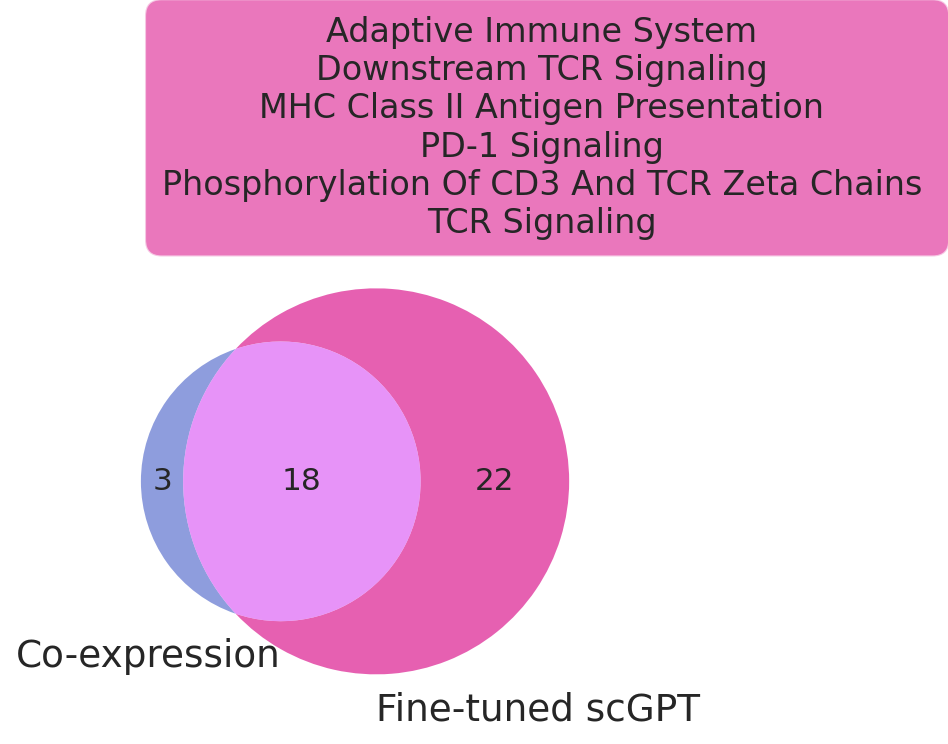

In [109]:
A = set(df_coexp['Term'])
B = set(df_scGPT['Term'])
a = [i.split('R-HSA')[0] for i in list(B-A) if 'Adaptive Immune System' in i or 'TCR' in i or 'PD' in i or 'MHC' in i]
a.sort()

v = venn2([A,B], ('Co-expression', 'Fine-tuned scGPT'), set_colors=('#5F74CF', '#DC1D90'), alpha = 0.7)
##B7ADEE

#v.get_label_by_id('10').set_text('\n'.join(A-B))
#v.get_label_by_id('10').set_fontsize(8)
#v.get_label_by_id('10').set_position([-0.5, -1])
plt.annotate('\n'.join(a), fontsize=15, xy=[0.7, 0.45], xytext=(-20,40), ha='center',
              textcoords='offset points', 
              bbox=dict(boxstyle='round, pad=0.5', fc='#DC1D90', alpha=0.6),
              #arrowprops=dict(arrowstyle='->', connectionstyle='arc', color='gray')
             )

#plt.annotate('\n'.join(B&A), fontsize=8, xy=[0.7, 0.45], xytext=(-20,40), ha='center',
#              textcoords='offset points', 
#              bbox=dict(boxstyle='round, pad=0.5', fc='yellow', alpha=0.1),
#              #arrowprops=dict(arrowstyle='->', connectionstyle='arc', color='gray')
#             )
plt.show()

In [10]:
B-A

{'Adaptive Immune System R-HSA-1280218',
 'Antiviral Mechanism By IFN-stimulated Genes R-HSA-1169410',
 'Classical Antibody-Mediated Complement Activation R-HSA-173623',
 'Costimulation By CD28 Family R-HSA-388841',
 'Creation Of C4 And C2 Activators R-HSA-166786',
 'Downstream TCR Signaling R-HSA-202424',
 'G1/S Transition R-HSA-69206',
 'G1/S-Specific Transcription R-HSA-69205',
 'Generation Of Second Messenger Molecules R-HSA-202433',
 'ISG15 Antiviral Mechanism R-HSA-1169408',
 'Initial Triggering Of Complement R-HSA-166663',
 'Interferon Gamma Signaling R-HSA-877300',
 'MHC Class II Antigen Presentation R-HSA-2132295',
 'Mitotic G1 Phase And G1/S Transition R-HSA-453279',
 'Muscle Contraction R-HSA-397014',
 'Nuclear Events (Kinase And Transcription Factor Activation) R-HSA-198725',
 'PD-1 Signaling R-HSA-389948',
 'Phosphorylation Of CD3 And TCR Zeta Chains R-HSA-202427',
 'RHO GTPases Activate PAKs R-HSA-5627123',
 'Smooth Muscle Contraction R-HSA-445355',
 'TCR Signaling R-HSA-

In [12]:
A&B

{'APC/C-mediated Degradation Of Cell Cycle Proteins R-HSA-174143',
 'APC/C:Cdc20 Mediated Degradation Of Mitotic Proteins R-HSA-176409',
 'Activation Of APC/C And APC/C:Cdc20 Mediated Degradation Of Mitotic Proteins R-HSA-176814',
 'Cell Cycle R-HSA-1640170',
 'Cell Cycle, Mitotic R-HSA-69278',
 'Cytokine Signaling In Immune System R-HSA-1280215',
 'Immune System R-HSA-168256',
 'Interferon Alpha/Beta Signaling R-HSA-909733',
 'Interferon Signaling R-HSA-913531',
 'M Phase R-HSA-68886',
 'Mitotic Anaphase R-HSA-68882',
 'Mitotic Metaphase And Anaphase R-HSA-2555396',
 'NGF-stimulated Transcription R-HSA-9031628',
 'Neutrophil Degranulation R-HSA-6798695',
 'Phosphorylation Of APC/C R-HSA-176412'}